In [6]:
import pandas as pd

# Load the Resume.csv file
resume_df = pd.read_csv("Resume.csv")

# Load the Training.csv file
training_df = pd.read_csv("training_data.csv")

# Show first 5 rows of each dataset
print("Resume Dataset:")
print(resume_df.head())

print("\nTraining Dataset:")
print(training_df.head())

# Display first few rows of each dataset
resume_head = resume_df.head()
training_head = training_df.head()

# Check column names
resume_columns = resume_df.columns.tolist()
training_columns = training_df.columns.tolist()

# Check for missing values and duplicates
resume_missing_values = resume_df.isnull().sum()
training_missing_values = training_df.isnull().sum()

resume_duplicates = resume_df.duplicated().sum()
training_duplicates = training_df.duplicated().sum()

# Show results
resume_head, training_head, resume_columns, training_columns, resume_missing_values, training_missing_values, resume_duplicates, training_duplicates


Resume Dataset:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Training Dataset:
  company_name                                    job_description  \
0       Google  minimum qualifications\nbachelors degree or eq...   
1        Apple  description\nas an asc you wil

(         ID                                         Resume_str  \
 0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
 1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
 2  33176873           HR DIRECTOR       Summary      Over 2...   
 3  27018550           HR SPECIALIST       Summary    Dedica...   
 4  17812897           HR MANAGER         Skill Highlights  ...   
 
                                          Resume_html Category  
 0  <div class="fontsize fontface vmargins hmargin...       HR  
 1  <div class="fontsize fontface vmargins hmargin...       HR  
 2  <div class="fontsize fontface vmargins hmargin...       HR  
 3  <div class="fontsize fontface vmargins hmargin...       HR  
 4  <div class="fontsize fontface vmargins hmargin...       HR  ,
   company_name                                    job_description  \
 0       Google  minimum qualifications\nbachelors degree or eq...   
 1        Apple  description\nas an asc you will be highly infl..

In [7]:
pip install nltk pandas beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Import necessary libraries
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# New preprocessing function using Scikit-learn's stopwords
def preprocess_text_sklearn(text):
    if pd.isnull(text):
        return ""

    text = str(text)  # Ensure string format

    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenization (split into words)
    words = text.split()

    # Remove stopwords using Scikit-learn's built-in stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Join words back into a clean sentence
    return " ".join(words)

# Apply the improved preprocessing function
resume_df["cleaned_resume"] = resume_df["Resume_str"].apply(preprocess_text_sklearn)
training_df["cleaned_job_description"] = training_df["job_description"].apply(preprocess_text_sklearn)

# Show cleaned text examples
resume_df[["Resume_str", "cleaned_resume"]].head(), training_df[["job_description", "cleaned_job_description"]].head()


(                                          Resume_str  \
 0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
 1           HR SPECIALIST, US HR OPERATIONS      ...   
 2           HR DIRECTOR       Summary      Over 2...   
 3           HR SPECIALIST       Summary    Dedica...   
 4           HR MANAGER         Skill Highlights  ...   
 
                                       cleaned_resume  
 0  hr administratormarketing associate hr adminis...  
 1  hr specialist hr operations summary versatile ...  
 2  hr director summary years experience recruitin...  
 3  hr specialist summary dedicated driven dynamic...  
 4  hr manager skill highlights hr skills hr depar...  ,
                                      job_description  \
 0  minimum qualifications\nbachelors degree or eq...   
 1  description\nas an asc you will be highly infl...   
 2  its an amazing time to be joining netflix as w...   
 3  description\n\nweb designers looking to expand...   
 4  at trackfive weve got big goal

In [12]:
# Step 4

# Import TF-IDF Vectorizer from Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF Vectorizer with parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words

# Fit and transform Resume texts
resume_tfidf = tfidf_vectorizer.fit_transform(resume_df["cleaned_resume"])

# Transform Job Description texts (using the same vocabulary from resumes)
job_desc_tfidf = tfidf_vectorizer.transform(training_df["cleaned_job_description"])

# Get shape of transformed data (rows: samples, columns: features)
resume_tfidf.shape, job_desc_tfidf.shape


((2484, 5000), (853, 5000))

In [16]:
# Step 5

# Re-import cosine similarity function (in case it's missing)
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Compute Cosine Similarity (Recalculate it)
cosine_sim = cosine_similarity(resume_tfidf, job_desc_tfidf)

# Step 2: Compute Jaccard Similarity (Already optimized and defined)
intersection = np.dot(resume_binary, job_desc_binary.T)
union = resume_binary.sum(axis=1)[:, None] + job_desc_binary.sum(axis=1) - intersection
jaccard_sim_fast = intersection / union

# Step 3: Compute Euclidean Distance (Smaller distance means higher similarity)
euclidean_sim = 1 / (1 + euclidean_distances(resume_tfidf, job_desc_tfidf))  # Normalize to range [0,1]

# Step 4: Combine Similarity Scores (Weighted Sum)
alpha, beta, gamma = 0.5, 0.3, 0.2  # Weights for cosine, jaccard, and euclidean similarity
combined_similarity = (alpha * cosine_sim) + (beta * jaccard_sim_fast) + (gamma * euclidean_sim)

# Step 5: Normalize the similarity scores to range [0,1]
normalized_similarity = (combined_similarity - combined_similarity.min()) / (combined_similarity.max() - combined_similarity.min())

# Get the shape of the new similarity matrix
normalized_similarity.shape



(2484, 853)

In [17]:
# Step 1: Get Top-5 Matches for Each Resume
top_n = 5  # We want the top 5 job matches
top_matches = np.argsort(-normalized_similarity, axis=1)[:, :top_n]  # Sort and get top-N indices

# Step 2: Retrieve Similarity Scores for the Top Matches
top_scores = np.sort(-normalized_similarity, axis=1)[:, :top_n] * -1  # Sort scores in descending order

# Step 3: Create a DataFrame for Advanced Ranking
expanded_data = []
for i, resume_id in enumerate(resume_df.index):
    for rank in range(top_n):
        job_id = top_matches[i, rank]
        similarity = top_scores[i, rank]
        
        # Apply Similarity Threshold (Remove Weak Matches < 0.5)
        if similarity >= 0.5:
            expanded_data.append([resume_id, job_id, rank + 1, similarity])

# Step 4: Convert to DataFrame
advanced_match_results = pd.DataFrame(expanded_data, columns=["Resume_ID", "Job_ID", "Rank", "Similarity_Score"])

# Step 5: Apply Weighting (Boost Higher Similarity Matches)
advanced_match_results["Weighted_Score"] = advanced_match_results["Similarity_Score"] * (1.2 - 0.05 * advanced_match_results["Rank"])

# Step 6: Sort by Weighted Score (Final Ranking)
advanced_match_results = advanced_match_results.sort_values(by=["Resume_ID", "Weighted_Score"], ascending=[True, False])

# Step 7: Display Top-10 Ranked Matches
advanced_match_results.head(10)


,Resume_ID,Job_ID,Rank,Similarity_Score,Weighted_Score
0,2,402,1,0.603716,0.694273
1,2,399,2,0.535255,0.588781
2,4,399,1,0.833354,0.958357
3,4,481,2,0.821490,0.903639
4,4,397,3,0.737430,0.774302
5,4,402,4,0.605318,0.605318
6,4,483,5,0.595859,0.566066
7,6,399,1,0.521813,0.600085
8,7,402,1,0.669365,0.769769
9,7,399,2,0.514089,0.565498


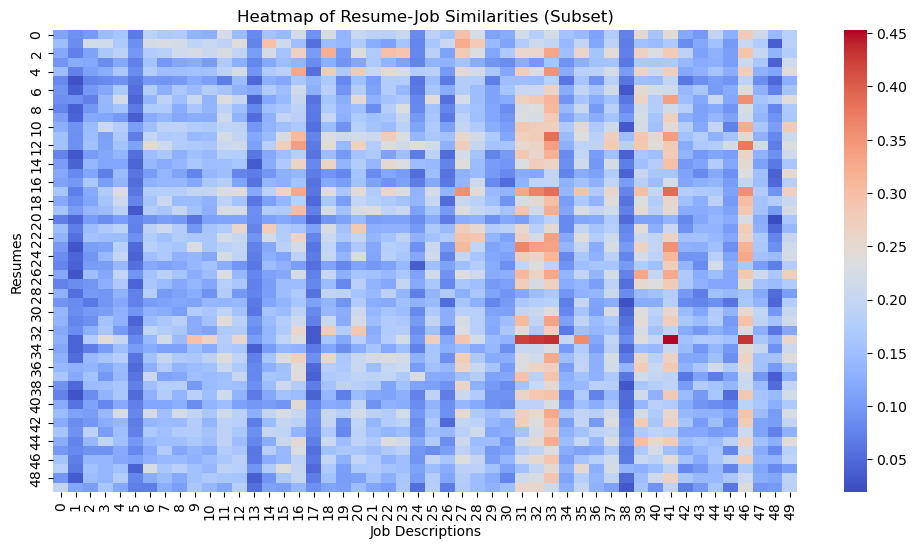

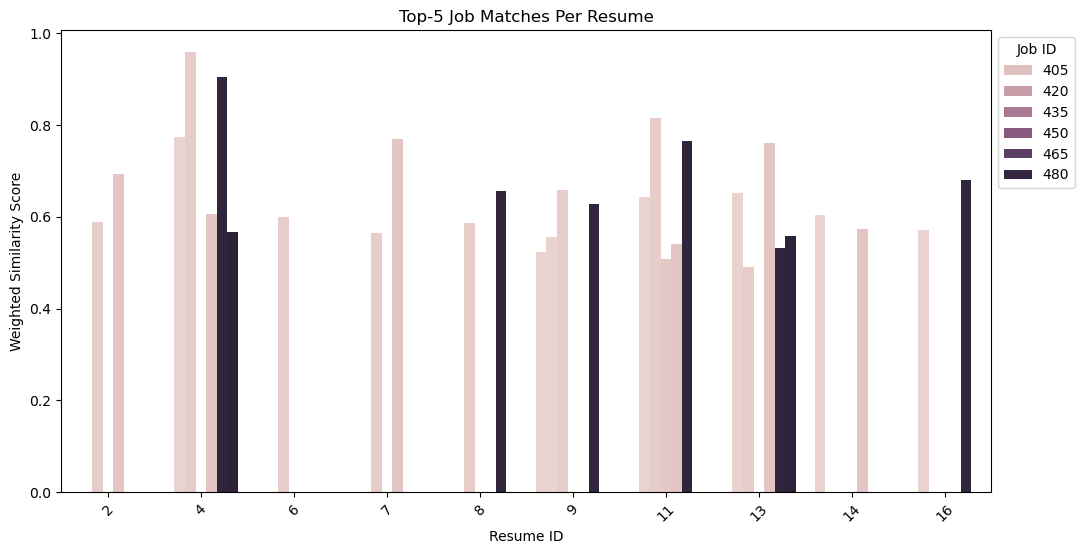

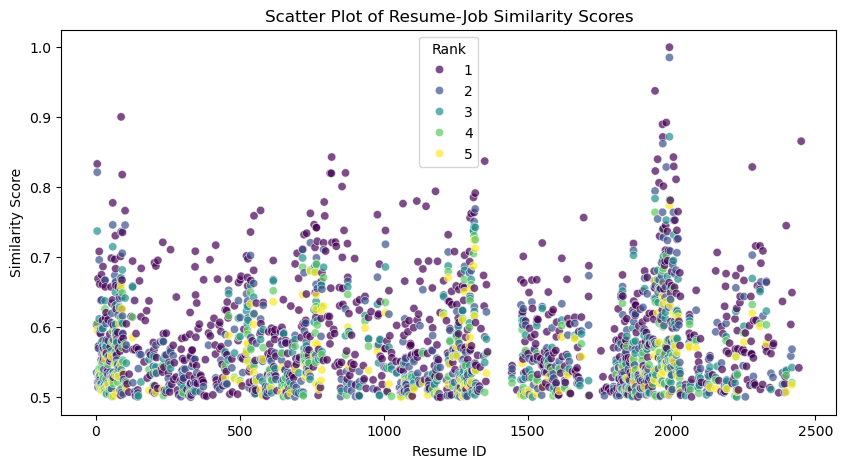

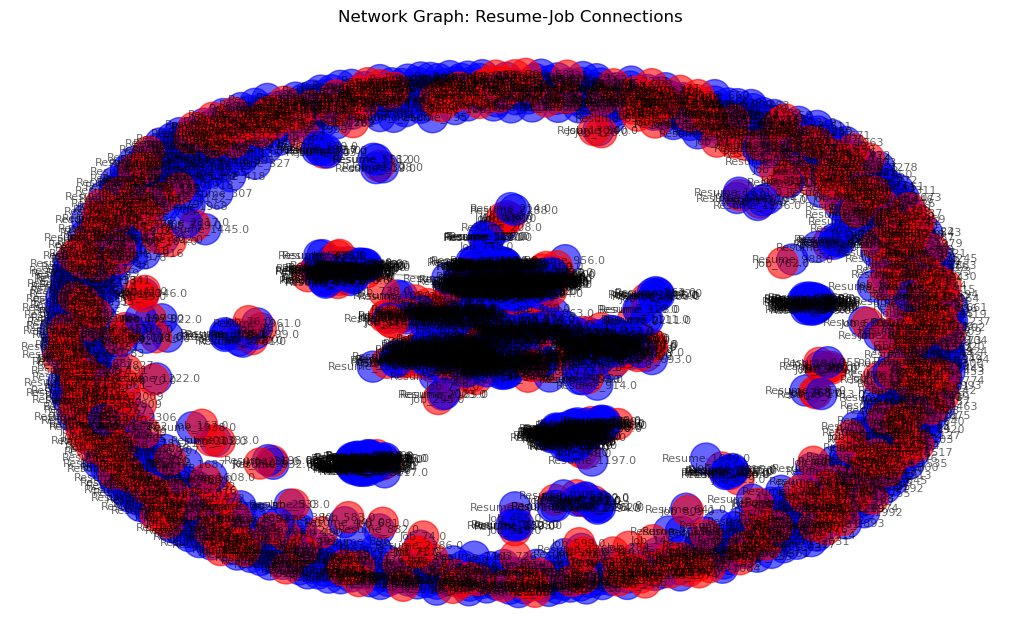

In [18]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Step 1: Heatmap of Resume-Job Similarities
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_similarity[:50, :50], cmap="coolwarm", annot=False)
plt.title("Heatmap of Resume-Job Similarities (Subset)")
plt.xlabel("Job Descriptions")
plt.ylabel("Resumes")
plt.show()

# Step 2: Bar Chart - Top 5 Job Matches Per Resume
plt.figure(figsize=(12, 6))
sns.barplot(data=advanced_match_results.head(30), x="Resume_ID", y="Weighted_Score", hue="Job_ID", dodge=True)
plt.title("Top-5 Job Matches Per Resume")
plt.xlabel("Resume ID")
plt.ylabel("Weighted Similarity Score")
plt.legend(title="Job ID", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

# Step 3: Scatter Plot - Similarity Score Distribution
plt.figure(figsize=(10, 5))
sns.scatterplot(data=advanced_match_results, x="Resume_ID", y="Similarity_Score", hue="Rank", palette="viridis", alpha=0.7)
plt.title("Scatter Plot of Resume-Job Similarity Scores")
plt.xlabel("Resume ID")
plt.ylabel("Similarity Score")
plt.show()

# Step 4: Network Graph - Resume to Job Matching
G = nx.Graph()

# Add nodes (Resumes and Jobs)
for resume_id in advanced_match_results["Resume_ID"].unique():
    G.add_node(f"Resume_{resume_id}", color="blue")

for job_id in advanced_match_results["Job_ID"].unique():
    G.add_node(f"Job_{job_id}", color="red")

# Add edges based on Top-5 matches
for _, row in advanced_match_results.iterrows():
    G.add_edge(f"Resume_{row['Resume_ID']}", f"Job_{row['Job_ID']}", weight=row["Similarity_Score"])

# Draw Network Graph
plt.figure(figsize=(10, 6))
colors = ["blue" if "Resume" in node else "red" for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color=colors, font_size=8, edge_color="gray", alpha=0.6)
plt.title("Network Graph: Resume-Job Connections")
plt.show()
